# **Objective**

The primary objective of this project was to design and build a Convolutional Neural Network (CNN) architecture using specified parameters, evaluate its performance, and compare it with modified versions using different strides and padding techniques. Additionally, we experimented with tuning model parameters and introduced data augmentation to enhance performance.

Lastly, we explored object detection using a pre-trained YOLO model, followed by a comparative analysis of YOLO and CNN to understand their performance in different contexts.




#### Step 1: Dataset Preparation
1. **Load the CIFAR-10 dataset**: The CIFAR-10 dataset contains **60,000 images** categorized into **10 classes** (e.g., airplanes, cars, birds, cats).
   
2. **Preprocessing**:
   - **Normalize pixel values**: Divide each pixel by 255 to scale values between 0 and 1.
   - **Purpose**: Normalization helps the model learn more effectively by keeping the input data on a consistent scale.


In [2]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


#### Step 2: Build a CNN Model

In this step, we built a **Convolutional Neural Network (CNN)** with multiple layers. We will experiment with different parameters such as **filters**, **stride**, and **padding** to observe their effects on model performance.

---

#### Model Architecture

1. **Input Layer**:
   - Input: 32x32x3 image (typical for CIFAR-10 images).

2. **Convolution Layer 1**:
   - **Filters**: 64 filters of size 3x3.
   - **Stride**: 1 (moves 1 pixel at a time across the image).
   - **Padding**: Same (keeps output size the same as input: 32x32).
   - **Activation**: ReLU (Rectified Linear Unit).
   - **Explanation**: ReLU activation helps the model handle non-linear patterns in the data more effectively.

3. **Pooling Layer 1**:
   - **Pooling Type**: 2x2 Max Pooling (reduces feature map size by half, from 32x32 to 16x16).
   - **Purpose**: Reduces computation by downsampling the feature maps, helping to prevent overfitting.
   - **Explanation**: This first convolution and pooling layer detects low-level features, such as edges and corners, while reducing spatial dimensions to simplify computation.

4. **Convolution Layer 2**:
   - **Filters**: 128 filters of size 3x3.
   - **Stride**: 1.
   - **Padding**: Same.
   - **Pooling Layer**: 2x2 Max Pooling (reduces feature map size to 8x8).
   - **Explanation**: This layer learns more complex features by using a larger number of filters. The pooling layer further reduces the feature map size.

5. **Convolution Layer 3**:
   - **Filters**: 256 filters of size 3x3.
   - **Stride**: 1.
   - **Padding**: Same.
   - **Pooling Layer**: 2x2 Max Pooling (reduces feature map size to 4x4).

6. **Fully Connected Layer**:
   - **Flattening**: Converts the 3D output of the last convolution layer to a 1D vector.
   - **Dense Layer**: 512 units.
   - **Dropout**: Apply a dropout of 0.5 to prevent overfitting.
   - **Explanation**: Dropout helps the model generalize by reducing its reliance on any single feature during training.

7. **Output Layer**:
   - **Dense Layer**: 10 units (one for each class in CIFAR-10).
   - **Activation**: Softmax (provides probabilities for each class).
   - **Explanation**: Softmax is suitable for multi-class classification, as it turns the network's output into probabilities that sum to 1. This makes it easy to interpret the model's prediction for each class.

---

**Note**: The architecture of this CNN model is structured to allow the network to gradually learn features from simple to complex as we move through the layers. Each convolution layer, followed by pooling, extracts increasingly detailed features, and the fully connected layers at the end allow the model to make final classification decisions.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# Convolution Layer 1
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Convolution Layer 2
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Convolution Layer 3
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 3: Training the CNN

In this step, we will train the CNN using the **Adam optimizer**. Adam combines the benefits of **momentum** and **RMSProp** to achieve faster and more stable convergence during training.

---

#### Training Details

- **Optimizer**: Adam
  - Combines momentum and RMSProp techniques to optimize learning.
- **Loss Function**: Categorical Cross-Entropy
  - Suitable for multi-class classification tasks, converting model outputs into probabilities for each class.
- **Epochs**: 10

---

#### Metrics to Record

During training, we recorded the following metrics after each epoch:
- **Training Accuracy**: Measures how accurately the model predicts on the training set.
- **Test Accuracy**: Measures how accurately the model generalizes to unseen test data.
- **Training Time per Epoch**: Tracks the duration of each epoch to assess the model's computational efficiency.

**Example**: Ran the training for 10 epochs and observed the changes in accuracy after each epoch to understand how the model improves over time.


782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9588 - loss: 0.1222 - val_accuracy: 0.7687 - val_loss: 1.2143
Epoch 1/10 - Training Accuracy: 0.9559, Test Accuracy: 0.7687, Time: 15.16s
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9616 - loss: 0.1103 - val_accuracy: 0.7706 - val_loss: 1.2243
Epoch 2/10 - Training Accuracy: 0.9562, Test Accuracy: 0.7706, Time: 7.78s
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9663 - loss: 0.0987 - val_accuracy: 0.7702 - val_loss: 1.2365
Epoch 3/10 - Training Accuracy: 0.9630, Test Accuracy: 0.7702, Time: 12.07s
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9605 - loss: 0.1124 - val_accuracy: 0.7658 - val_loss: 1.2984
Epoch 4/10 - Training Accuracy: 0.9586, Test Accuracy: 0.7658, Time: 12.73s
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9664 - loss: 0.0993 - val_accuracy: 0.7601 - val_loss: 1.3608
Epoch 5/10 - Training Accuracy: 0.9632, Test Accuracy: 0.7601, Time: 11.97s
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7m

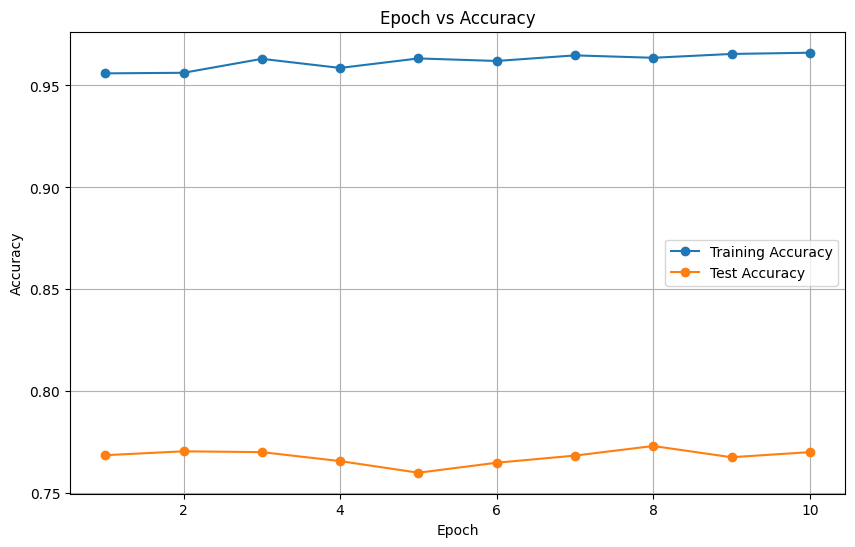

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


epochs = 10
batch_size = 64
training_accuracies = []
test_accuracies = []
training_times = []

for epoch in range(epochs):
    start_time = time.time()

    # Train for one epoch
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1, validation_data=(x_test, y_test), verbose=1)

    # Record metrics
    train_accuracy = history.history['accuracy'][0]
    test_accuracy = history.history['val_accuracy'][0]
    training_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Calculate training time for this epoch
    epoch_time = time.time() - start_time
    training_times.append(epoch_time)

    print(f"Epoch {epoch + 1}/{epochs} - Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}, Time: {epoch_time:.2f}s")

# Display final results
print("\nFinal Training Accuracy:", training_accuracies[-1])
print("Final Test Accuracy:", test_accuracies[-1])
print("Average Training Time per Epoch:", np.mean(training_times))

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), training_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy', marker='o')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()





### Results:

- Training Accuracy: ~96%.
- Test Accuracy: ~77%.
- Average Training Time per Epoch: ~11.5 seconds.

### Observations:

- The training accuracy was significantly higher than the test accuracy, indicating overfitting.
- The graph highlights a growing validation loss despite decreasing training loss, confirming that the model failed to generalize well to unseen data.
- The model complexity was slightly excessive for the relatively simple CIFAR-10 dataset.

## Mitigating Overfitting

### Optimization Approach
To enhance model performance, we employed advanced hyperparameter optimization techniques:
- **Keras Tuner**: Utilized for automated hyperparameter search.
- **Parameter Exploration**: Tested multiple combinations using:
  - Random search: 10 test combinations with 3 trials each.

### Key Parameters Investigated
- Learning rate variations.
- Dense layer neuron count.
- Dropout rate adjustment.

### Data Augmentation Techniques
To improve model generalization, we implemented the following data augmentation strategies:
- Random rotations.
- Random shifts.
- Random shears.
- Random zooms.
- Random horizontal flips.


In [ ]:
pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Apply data augmentation to the CIFAR-10 training data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
test_generator = test_datagen.flow(test_images, test_labels, batch_size=32)

import keras_tuner as kt

def build_model(hp):
    model = Sequential([
        # Input layer
        Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(2, 2),

        # Convolution layer 1
        Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
        MaxPooling2D(2, 2),

        # Convolution layer 2
        Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
        MaxPooling2D(2, 2),

        # Flattening the output for the fully connected layer
        Flatten(),

        # Fully connected layer
        Dense(units=hp.Int('units', min_value=128, max_value=512, step=32), activation='relu'),
        Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)),

        # Output layer
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='hparam_tuning'
)

tuner.search(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Retrieve the best model.
model = tuner.get_best_models(num_models=1)[0]

# The best model is retrieved and the following fit function is called:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# After fitting the model, print the training and validation accuracy for each epoch
print("Training and validation accuracy per epoch:")
for epoch in range(10):
    train_acc = history.history['accuracy'][epoch]
    val_acc = history.history['val_accuracy'][epoch]
    print(f"Epoch {epoch + 1}: Training Acc: {train_acc:.4f}, Validation Acc: {val_acc:.4f}")



Trial 10 Complete [00h 04m 57s]
val_accuracy: 0.7360666592915853

Best val_accuracy So Far: 0.743233323097229
Total elapsed time: 00h 49m 03s
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.3902 - loss: 1.7136 - val_accuracy: 0.6237 - val_loss: 1.0970
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 30ms/step - accuracy: 0.5362 - loss: 1.3009 - val_accuracy: 0.6238 - val_loss: 1.0714
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.5804 - loss: 1.1936 - val_accuracy: 0.6645 - val_loss: 0.9514
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6019 - loss: 1.1254 - val_accuracy: 0.6804 - val_loss: 0.9238
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.6260 - loss: 1.0631 - val_accuracy: 0.6916 - val_loss: 0.8783
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.6383 - loss: 1.0225 - val_accuracy: 0.7054 - val_loss: 0.8508
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.6542 - loss: 0.9871 - val_accuracy: 0.7215 - val_loss: 0.7938
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6694 - loss: 0.94

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
# After fitting the model, print the training and validation accuracy for each epoch
print("Training and validation accuracy per epoch:")
train_acc = []  # List to store training accuracy for each epoch
val_acc = []    # List to store validation accuracy for each epoch

for epoch in range(10):
    epoch_train_acc = history.history['accuracy'][epoch]
    epoch_val_acc = history.history['val_accuracy'][epoch]
    print(f"Epoch {epoch + 1}: Training Acc: {epoch_train_acc:.4f}, Validation Acc: {epoch_val_acc:.4f}")
    train_acc.append(epoch_train_acc)  # Append training accuracy of the current epoch
    val_acc.append(epoch_val_acc)      # Append validation accuracy of the current epoch




Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6901 - loss: 0.8815 - val_accuracy: 0.7556 - val_loss: 0.7071
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7047 - loss: 0.8488 - val_accuracy: 0.7393 - val_loss: 0.7457
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.7039 - loss: 0.8438 - val_accuracy: 0.7381 - val_loss: 0.7631
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.7097 - loss: 0.8396 - val_accuracy: 0.7623 - val_loss: 0.6993
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7168 - loss: 0.8045 - val_accuracy: 0.7721 - val_loss: 0.6668
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.7222 - loss: 0.7962 - val_accuracy: 0.7743 - val_loss: 0.6572
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.7280 - loss: 0.7806 - val_accuracy: 0.7870 - val_loss: 0.6194
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.7351 -

#### Results After Tuning:

- Training Accuracy: Started at 39.02% and increased to 68.30% over 10 epochs.
Validation Accuracy: Improved from 62.37% to 75.00%.
- Training accuracy reduced due to regularization, but the validation accuracy improved, indicating better generalization.
- The gap between training and validation accuracy was significantly reduced.


### Step 4: Experimenting with Stride and Padding

In this step, we experimented with the **stride** and **padding** settings in the CNN architecture to observe how they impact the model's performance and feature map sizes.

---

#### Modifications to the CNN Architecture

1. **Stride Adjustment**
   - Set **stride = 2** in the convolution layers.
   - **Observation**: Larger strides will produce smaller feature maps because the filter moves 2 pixels at a time across the image.
   
2. **Padding Adjustment**
   - Change **padding** from `'same'` to `'valid'`.
   - **Observation**: Using `'valid'` padding will shrink the output feature maps, as no padding is added around the borders. This can speed up training but may reduce accuracy due to loss of edge information.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Experimental Configurations

We explored three primary configuration variations to evaluate their impact on model performance:

1. **Stride `2` and Padding `Valid`**  
   - Results in significant spatial dimension reduction due to the combination of higher stride and no padding.

2. **Stride `2` and Padding `Same`**  
   - Maintains the spatial dimensions initially but still reduces them aggressively due to the higher stride.

3. **Stride `1` and Padding `Valid`**  
   - Minimizes spatial dimension reduction, preserving more spatial details and leading to improved performance.


### Stride 2 and Padding Same

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3085 - loss: 1.8232 - val_accuracy: 0.4815 - val_loss: 1.4222
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5273 - loss: 1.3009 - val_accuracy: 0.5768 - val_loss: 1.1766
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5981 - loss: 1.1223 - val_accuracy: 0.5943 - val_loss: 1.1177
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6352 - loss: 1.0214 - val_accuracy: 0.6333 - val_loss: 1.0400
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6673 - loss: 0.9356 - val_accuracy: 0.6483 - val_loss: 1.0030
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6904 - loss: 0.8659 - val_accuracy: 0.6534 - val_loss: 0.9891
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7157 - loss: 0.7937 - val_accuracy: 0.6562 - val_loss: 0.9854
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7369 - loss: 0.7433 

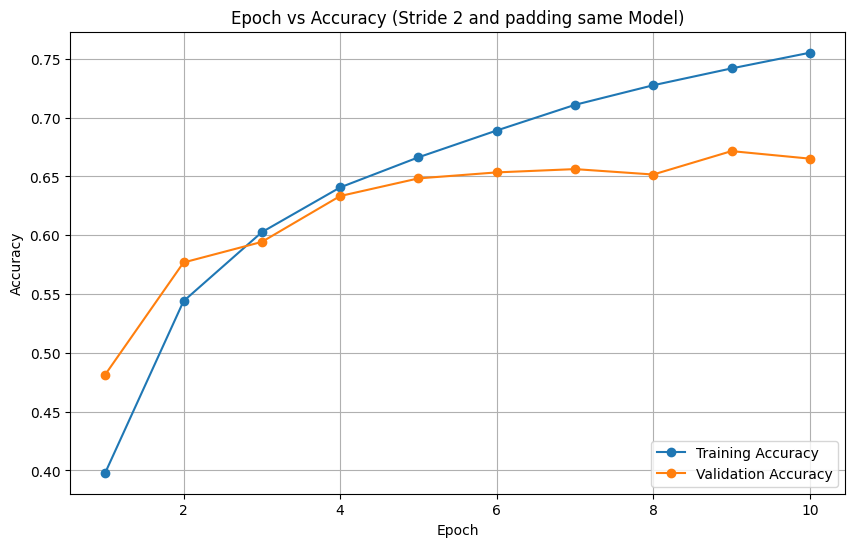

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and normalize the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the CNN model with stride 2
model_stride = models.Sequential()

# Input Layer
model_stride.add(layers.Input(shape=(32, 32, 3)))

# Convolution Layer with stride = 2
model_stride.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model_stride.add(layers.MaxPooling2D((2, 2)))

model_stride.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model_stride.add(layers.MaxPooling2D((2, 2)))

model_stride.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model_stride.add(layers.GlobalAveragePooling2D())  # Use Global Average Pooling instead of MaxPooling

# Fully Connected Layer
model_stride.add(layers.Flatten())
model_stride.add(layers.Dense(512, activation='relu'))
model_stride.add(layers.Dropout(0.5))

# Output Layer
model_stride.add(layers.Dense(10, activation='softmax'))

# Compile and train the model
model_stride.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_stride = model_stride.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss_stride, test_acc_stride = model_stride.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy with stride 2: {test_acc_stride}")

# Plot training history
plt.figure(figsize=(10, 6))
epochs_range = range(1, 11)  # As epochs count starts at 1 and ends at 10
plt.plot(epochs_range, history_stride.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs_range, history_stride.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Epoch vs Accuracy (Stride 2 and padding same Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Results:
- This configuration led to rapid reduction in feature map size, causing the model to lose spatial details.
- Both training and test accuracies significantly dropped compared to the baseline model.

### Stride 1 and padding valid

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.2939 - loss: 1.8491 - val_accuracy: 0.5276 - val_loss: 1.2803
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5438 - loss: 1.2677 - val_accuracy: 0.6146 - val_loss: 1.0806
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6259 - loss: 1.0579 - val_accuracy: 0.6596 - val_loss: 0.9865
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6834 - loss: 0.9072 - val_accuracy: 0.6830 - val_loss: 0.8987
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7120 - loss: 0.8196 - val_accuracy: 0.7195 - val_loss: 0.8158
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7493 - loss: 0.7259 - val_accuracy: 0.7142 - val_loss: 0.8404
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7612 - loss: 0.6779 - val_accuracy: 0.7400 - val_loss: 0.7548
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7849 - loss: 0.61

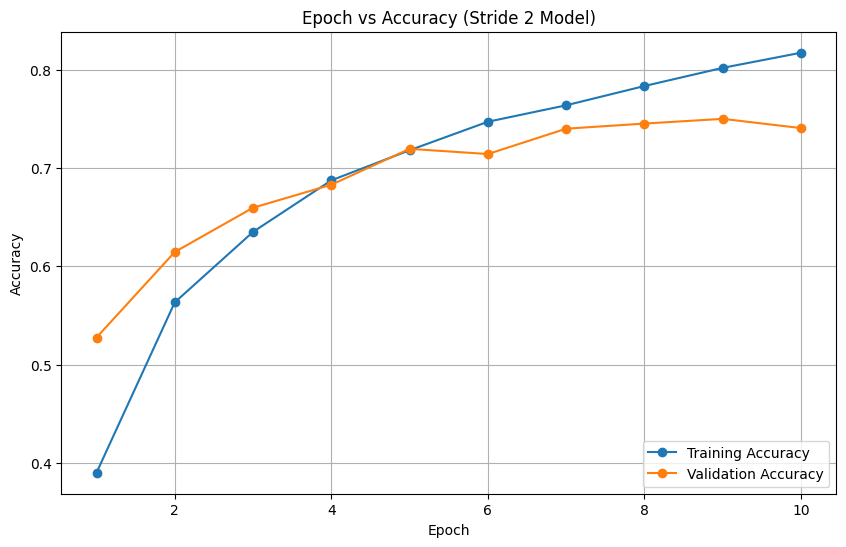

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and normalize the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the CNN model with stride 2
model_stride = models.Sequential()

# Input Layer
model_stride.add(layers.Input(shape=(32, 32, 3)))

# Convolution Layer with stride = 2
model_stride.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid', strides=1))
model_stride.add(layers.MaxPooling2D((2, 2)))

model_stride.add(layers.Conv2D(128, (3, 3), activation='relu', padding='valid', strides=1))
model_stride.add(layers.MaxPooling2D((2, 2)))

model_stride.add(layers.Conv2D(256, (3, 3), activation='relu', padding='valid', strides=1))
model_stride.add(layers.GlobalAveragePooling2D())  # Use Global Average Pooling instead of MaxPooling

# Fully Connected Layer
model_stride.add(layers.Flatten())
model_stride.add(layers.Dense(512, activation='relu'))
model_stride.add(layers.Dropout(0.5))

# Output Layer
model_stride.add(layers.Dense(10, activation='softmax'))

# Compile and train the model
model_stride.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_stride = model_stride.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss_stride, test_acc_stride = model_stride.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy with stride 2: {test_acc_stride}")

# Plot training history
plt.figure(figsize=(10, 6))
epochs_range = range(1, 11)  # As epochs count starts at 1 and ends at 10
plt.plot(epochs_range, history_stride.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs_range, history_stride.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Epoch vs Accuracy (Stride 1 and pading valid Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Results
- This setup minimized spatial resolution reduction while retaining key spatial information.
- As a result, both training and validation accuracies improved compared to the baseline model.

### Stride 2 and Padding Valid

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 139ms/step - accuracy: 0.3138 - loss: 1.8199 - val_accuracy: 0.5400 - val_loss: 1.2637
Epoch 1/10 - Training Accuracy: 0.4048, Test Accuracy: 0.5400, Time: 144.93s
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 137ms/step - accuracy: 0.5457 - loss: 1.2611 - val_accuracy: 0.6062 - val_loss: 1.0927
Epoch 2/10 - Training Accuracy: 0.5629, Test Accuracy: 0.6062, Time: 143.13s
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 137ms/step - accuracy: 0.6143 - loss: 1.0781 - val_accuracy: 0.6557 - val_loss: 0.9657
Epoch 3/10 - Training Accuracy: 0.6262, Test Accuracy: 0.6557, Time: 143.14s
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 137ms/step - accuracy: 0.6643 - loss: 0.9517 - val_accuracy: 0.6739 - val_loss: 0.9218
Epoch 4/10 - Training Accuracy: 0.6690, Test Accuracy: 0.6739, Time: 143.13s
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 137ms/step - accuracy: 0.6982 - loss: 0.8574 - val_accuracy: 0.6813 - val_loss: 0.9126
Epoch 5/10 - Training Accuracy: 0.

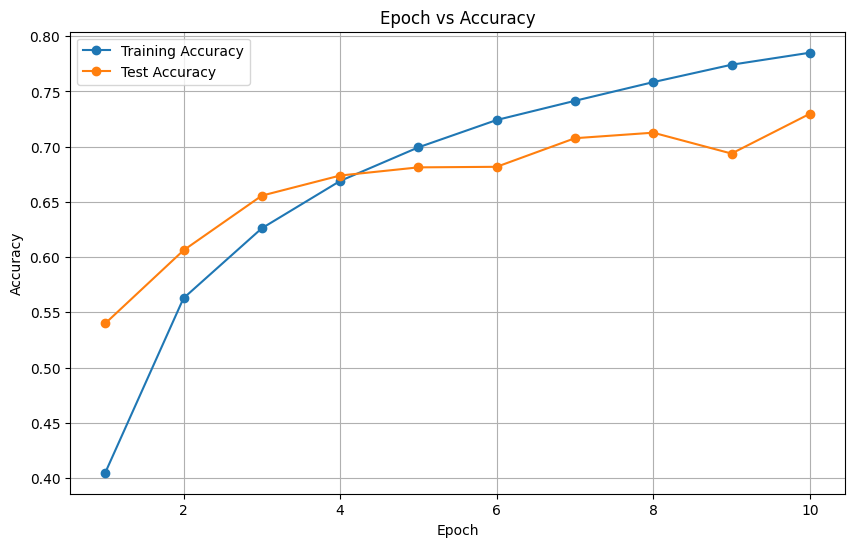

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# Convolution Layer 1
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# Convolution Layer 2
model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# Convolution Layer 3
model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(10, activation='softmax'))

import time
import numpy as np
import matplotlib.pyplot as plt

# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and record training time per epoch
epochs = 10
batch_size = 64
training_accuracies = []
test_accuracies = []
training_times = []

for epoch in range(epochs):
    start_time = time.time()

    # Train for one epoch
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1, validation_data=(x_test, y_test), verbose=1)

    # Record metrics
    train_accuracy = history.history['accuracy'][0]
    test_accuracy = history.history['val_accuracy'][0]
    training_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Calculate training time for this epoch
    epoch_time = time.time() - start_time
    training_times.append(epoch_time)

    print(f"Epoch {epoch + 1}/{epochs} - Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}, Time: {epoch_time:.2f}s")

# Display final results
print("\nFinal Training Accuracy:", training_accuracies[-1])
print("Final Test Accuracy:", test_accuracies[-1])
print("Average Training Time per Epoch:", np.mean(training_times))

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), training_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy', marker='o')
plt.title('Epoch vs Accuracy for Stride 2 and Padding valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### Results
- This combination reduced spatial dimensions too aggressively, impacting model performance.
- Test accuracy decreased to ~72%, which was lower than the baseline but better than using stride = 2 and padding = 'same'.

## **YOLOv5 Object Detection**

In this section, we used a **pre-trained YOLOv5 model** to perform object detection on test images. YOLOv5 is a powerful model for detecting multiple objects within images by drawing bounding boxes around each detected object.

---

### Step 1: Using a Pre-Trained YOLOv5 Model

1. **Download and Load the YOLOv5 Model**
   - Use the pre-trained **YOLOv5s model** (the small version of YOLOv5) for object detection tasks.
   
2. **Run the Model on Test Images**
   - Choose a few test images (such as images of animals, cars, etc.).
   - Use the YOLOv5 model to detect objects in each image and draw **bounding boxes** around the detected objects.

3. **Visualization**
   - Display each image with bounding boxes and class labels overlaid.
   - **Example**: If you use an image with a cat and a dog, YOLO will output two bounding boxes—one around the cat and one around the dog—along with their respective **class labels** and **confidence scores**.

---

### Step 2: Object Detection in Practice

In this task, we will leverage the pre-trained YOLOv5 model without the need to train it from scratch.

#### Task Instructions

1. **Run YOLOv5 on 3 to 5 Test Images**:
   - Select 3 to 5 images for testing object detection (you can choose images from categories like animals, vehicles, or outdoor scenes).
   - For each image, display the results with bounding boxes drawn around the detected objects.

2. **Visualization of Results**:
   - Show the images with bounding boxes and corresponding class labels for each detected object.
   - Each bounding box will include:
     - **Class Label**: The detected object’s label (e.g., "cat" or "dog").
     - **Confidence Score**: The confidence level of each detection.

#### Example

Using an image with multiple objects, such as a street scene with cars, people, and traffic signs, the YOLOv5 model will identify and mark each object with a bounding box and the object’s label, helping visualize how object detection models can parse complex scenes.


In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone the YOLOv5 GitHub repository
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 17075 (delta 29), reused 30 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17075/17075), 15.69 MiB | 13.49 MiB/s, done.
Resolving deltas: 100% (11723/11723), done.
/content/yolov5


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-10 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded


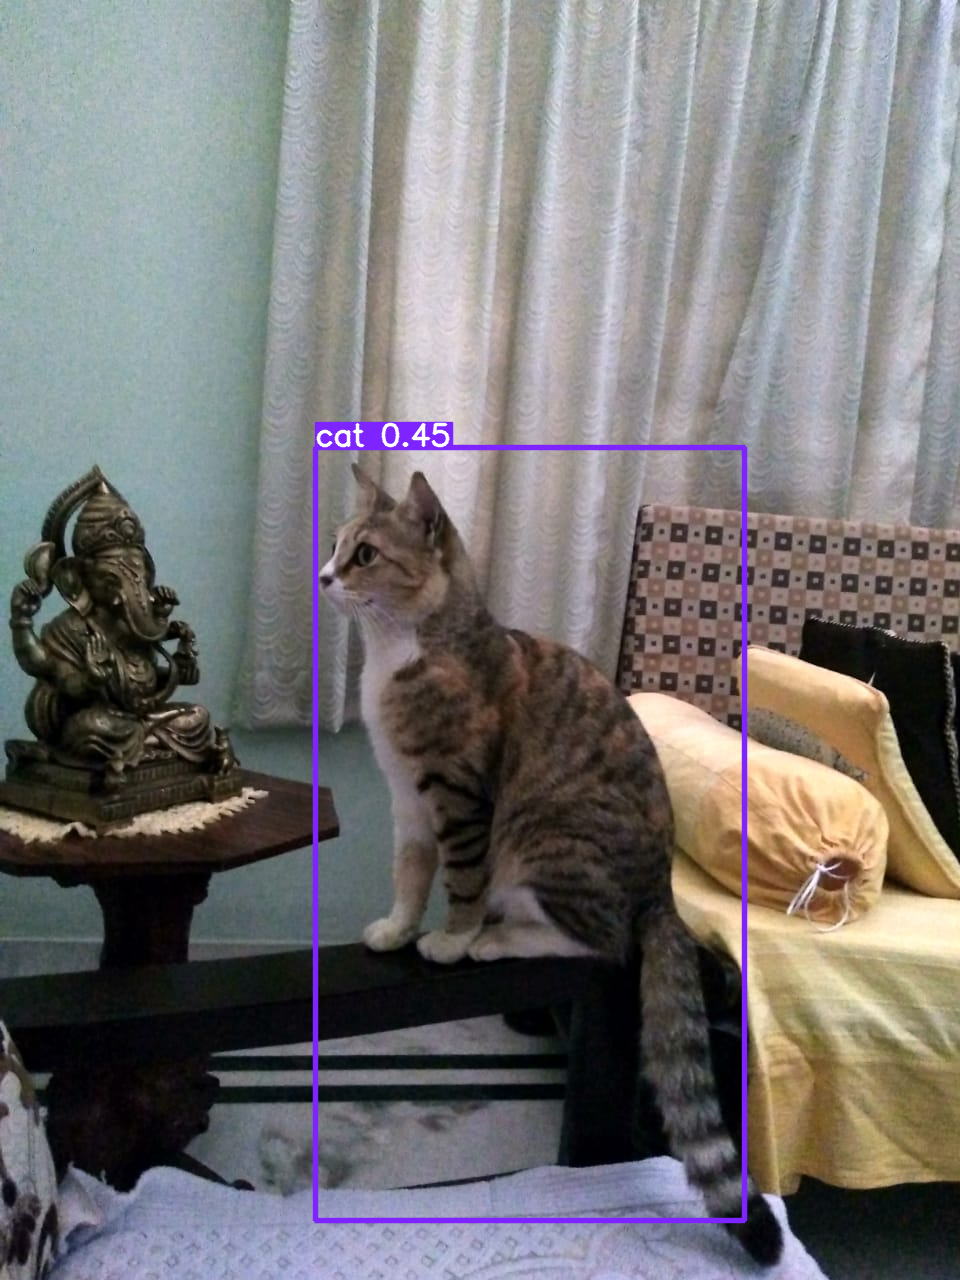

image 1/1: 1280x960 1 cat
Speed: 620.9ms pre-process, 288.9ms inference, 1457.2ms NMS per image at shape (1, 3, 640, 480)
Saved 1 image to runs/detect/batch_results2


Detections for A.jpeg:
         xmin        ymin        xmax         ymax  confidence  class name
0  315.838898  447.885895  744.228516  1220.488403    0.453781     15  cat


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


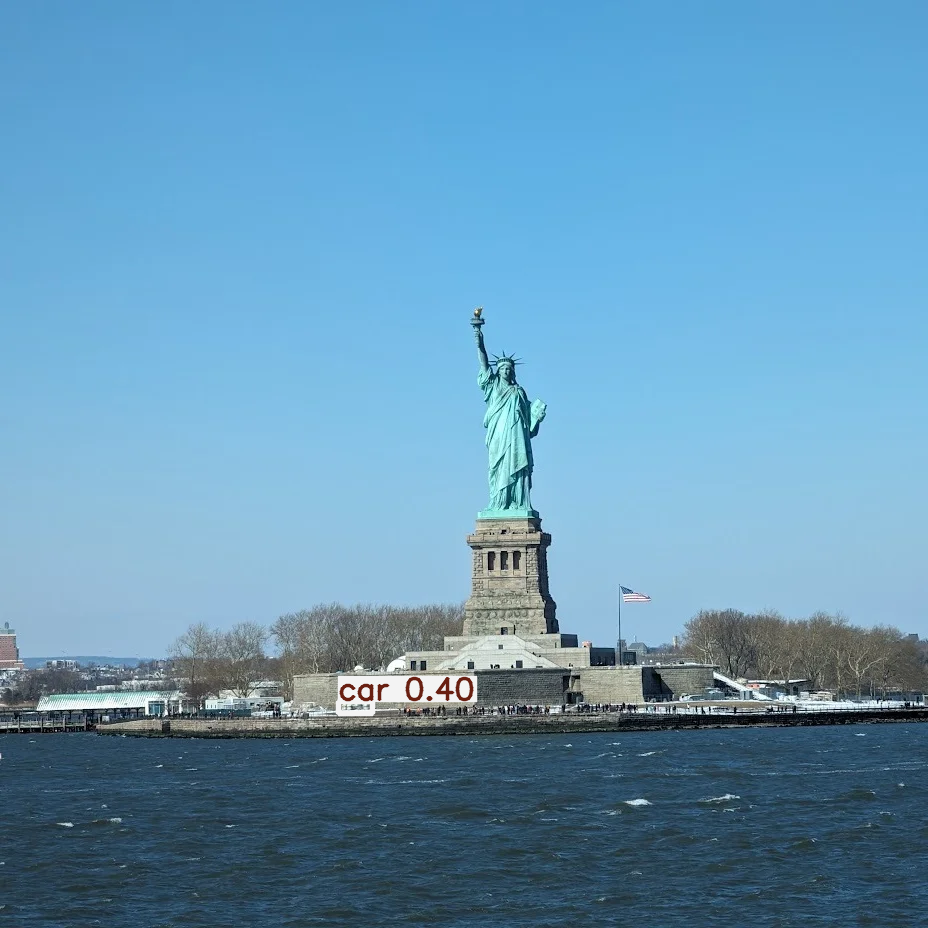

image 1/1: 928x928 1 car
Speed: 516.8ms pre-process, 31.3ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Saved 1 image to runs/detect/batch_results3


Detections for B.jpeg:
        xmin        ymin        xmax        ymax  confidence  class name
0  338.83432  701.588745  372.753357  713.474243      0.4023      2  car


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


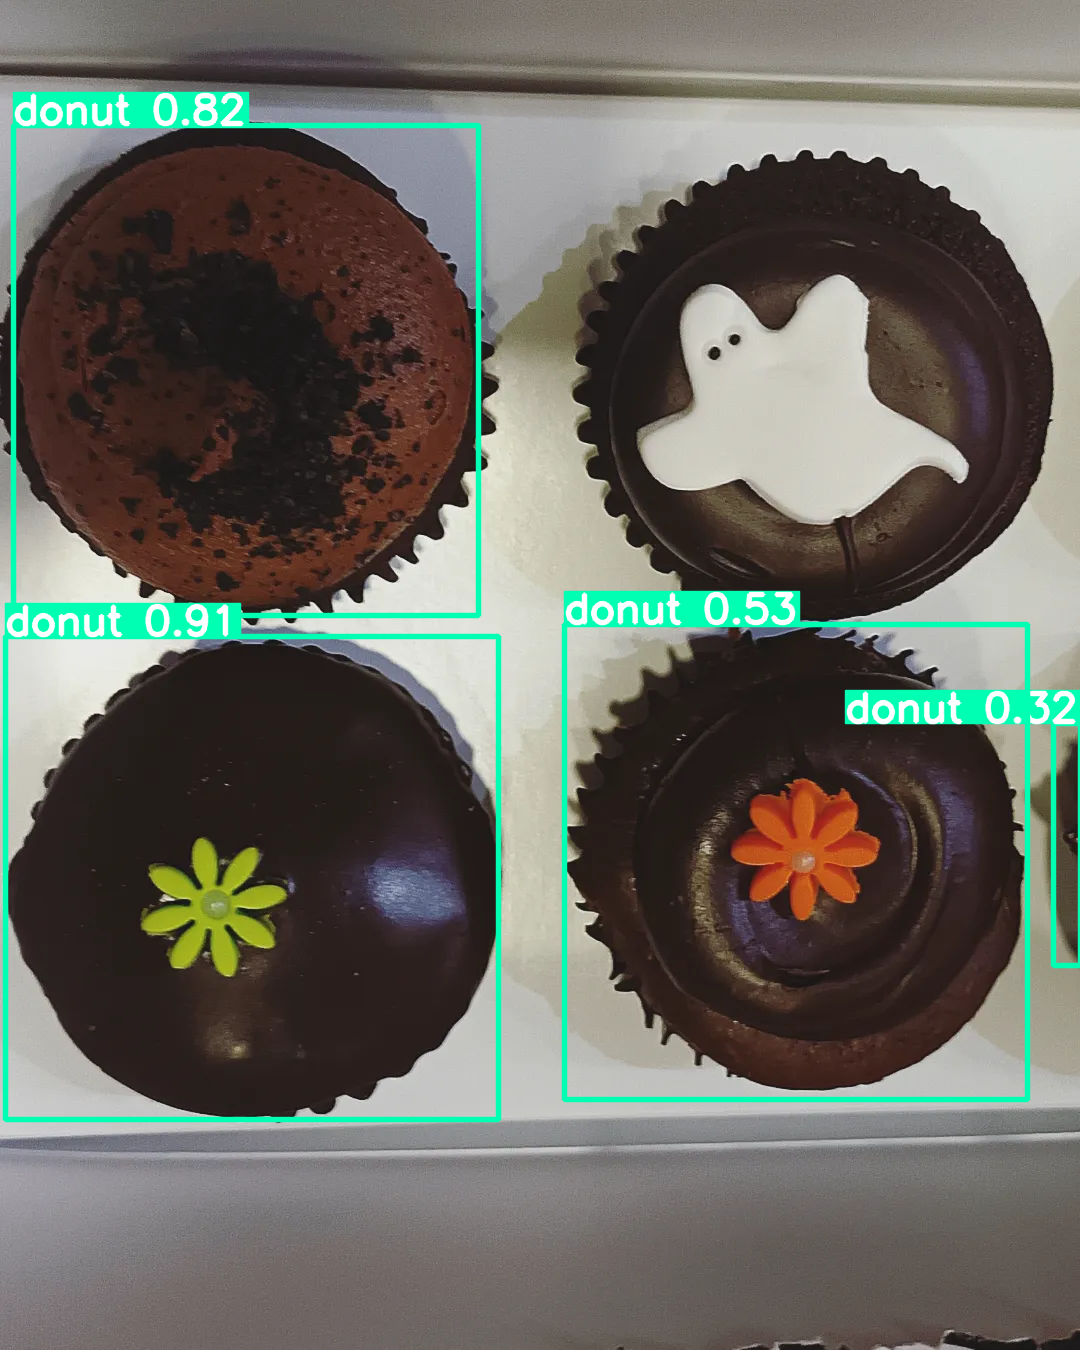

image 1/1: 1350x1080 4 donuts
Speed: 440.5ms pre-process, 31.7ms inference, 2.0ms NMS per image at shape (1, 3, 640, 512)
Saved 1 image to runs/detect/batch_results4


Detections for C.jpeg:
          xmin        ymin         xmax         ymax  confidence  class   name
0     5.320607  636.175110   498.494415  1119.157349    0.913027     54  donut
1    13.570653  125.526352   478.792389   615.186768    0.819619     54  donut
2   564.392090  624.996338  1027.230469  1099.058350    0.526312     54  donut
3  1053.279541  723.332825  1080.000000   965.857910    0.321502     54  donut


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


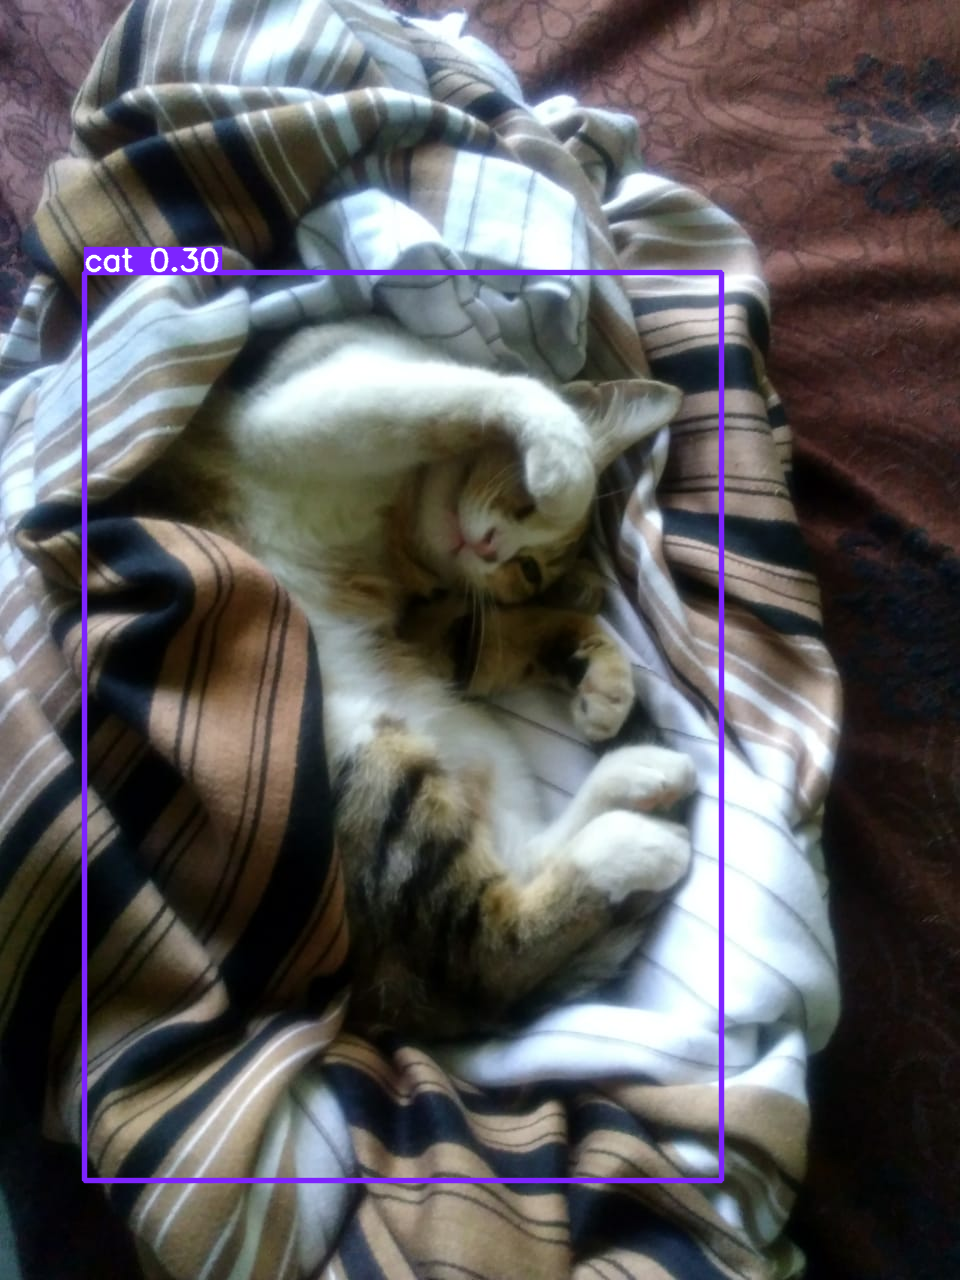

image 1/1: 1280x960 1 cat
Speed: 458.9ms pre-process, 8.0ms inference, 2.7ms NMS per image at shape (1, 3, 640, 480)
Saved 1 image to runs/detect/batch_results5


Detections for D.jpeg:
        xmin        ymin        xmax        ymax  confidence  class name
0  84.596527  272.899994  721.801758  1180.52356    0.301114     15  cat


In [3]:
import os
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Adjust model parameters if needed
model.conf = 0.25  # Confidence threshold (0-1)
model.iou = 0.45   # IoU threshold for NMS (0-1)
model.classes = None  # List of class indices to filter, None for all classes
model.max_det = 1000  # Maximum number of detections per image
model.amp = False  # Automatic mixed precision (False for CPU inference)

# List of image filenames
image_files = ['A.jpeg', 'B.jpeg', 'C.jpeg', 'D.jpeg']

# Directory where images are stored
image_dir = '/content/drive/My Drive/Colab Notebooks/CV/data/'

# Directory to save results
save_dir = 'runs/detect/batch_results'

# Create the save directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Process each image
for image_name in image_files:
    # Full path to the image file
    image_path = os.path.join(image_dir, image_name)

    # Check if the image file exists
    if not os.path.isfile(image_path):
        print(f"Image {image_path} not found. Skipping.")
        continue

    # Perform inference
    results = model(image_path)

    results.show()

    # Print results
    results.print()  # Display results in the terminal

    # Save results
    results.save(save_dir=save_dir)  # Saves image with detections

    # If you need the data, you can access it as a pandas DataFrame
    detections = results.pandas().xyxy[0]
    print(f"Detections for {image_name}:")
    print(detections)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-5 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded


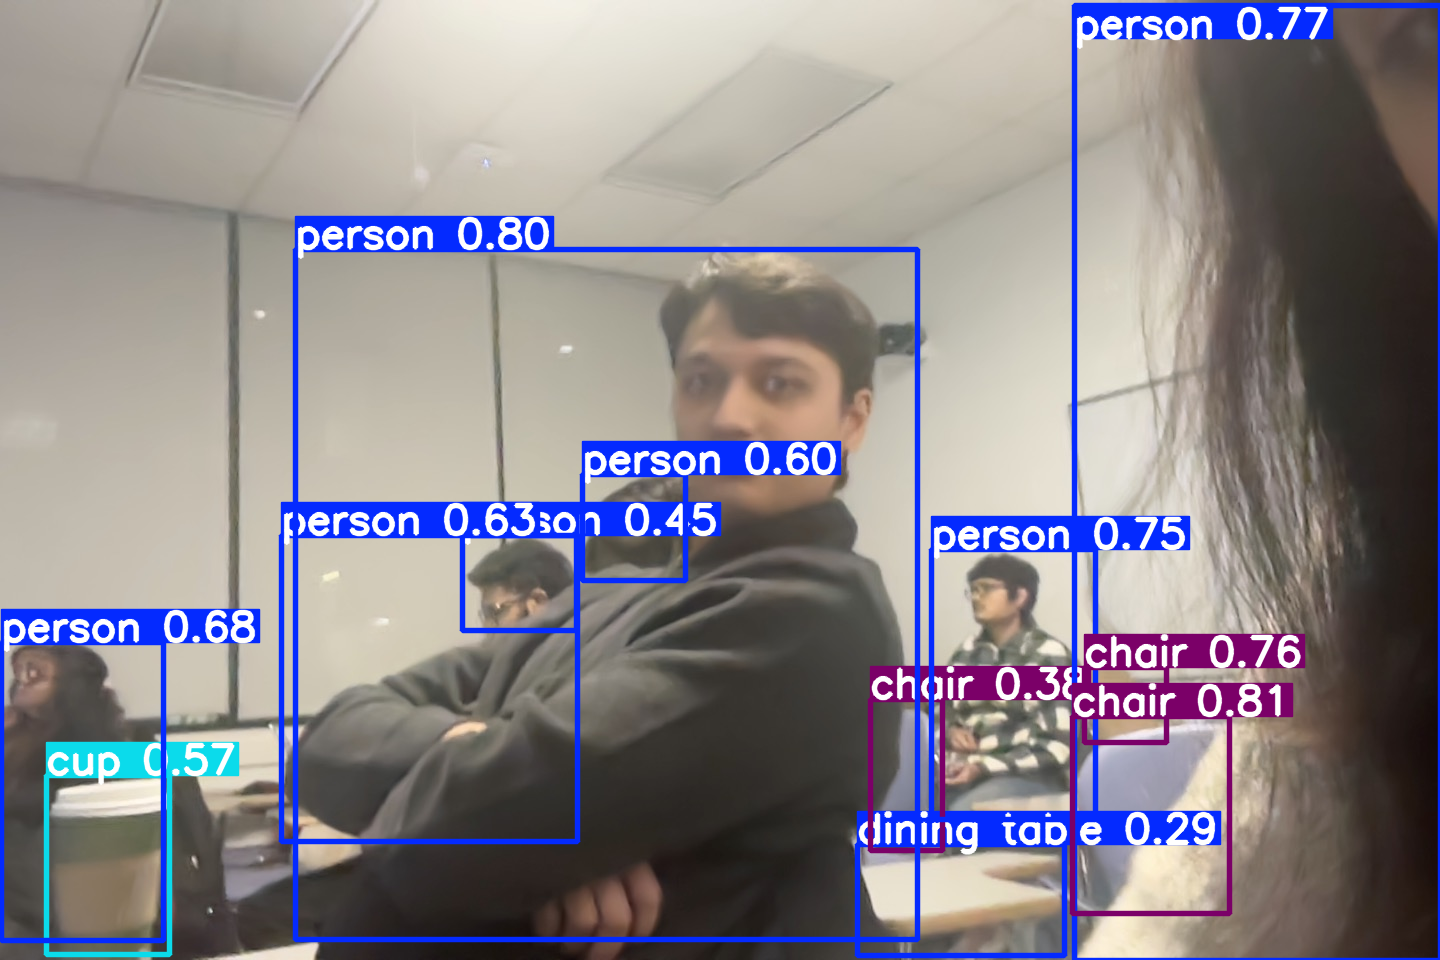

image 1/1: 960x1440 7 persons, 1 cup, 3 chairs, 1 dining table
Speed: 546.5ms pre-process, 97.3ms inference, 1176.9ms NMS per image at shape (1, 3, 448, 640)
Saved 1 image to runs/detect/batch_results2


Detections for H.jpeg:
           xmin        ymin         xmax        ymax  confidence  class  \
0   1072.052856  716.124634  1229.969727  913.180786    0.809483     56   
1    295.506622  249.626144   917.614746  939.791199    0.797592      0   
2   1074.724609    5.298923  1440.000000  960.000000    0.772508      0   
3   1084.843994  667.648987  1166.067627  742.979736    0.762515     56   
4    931.160034  549.943909  1095.400391  819.347778    0.749494      0   
5      1.402001  642.424072   163.027359  940.882690    0.682757      0   
6    281.767761  535.834778   577.942627  841.761353    0.627773      0   
7    582.135315  474.865295   685.426453  580.148926    0.596521      0   
8     46.877625  775.486084   169.039551  954.177490    0.565619     41   
9    462.526672  535.924805   576.352539  630.782288    0.445716      0   
10   870.890381  699.542908   942.056091  850.874084    0.381369     56   
11   857.473694  844.593506  1064.811768  955.432861    0.292835     60   

 

In [ ]:
import os
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

model.conf = 0.25  # Confidence threshold (0-1)
model.iou = 0.45   # IoU threshold for NMS (0-1)
model.classes = None  # List of class indices to filter, None for all classes
model.max_det = 1000  # Maximum number of detections per image
model.amp = False  # Automatic mixed precision (False for CPU inference)

# List of image filenames
image_files = ['H.jpeg']

# Directory where images are stored
image_dir = '/content/drive/My Drive/Colab Notebooks/CV/data/'

# Directory to save results
save_dir = 'runs/detect/batch_results'

# Create the save directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Process each image
for image_name in image_files:
    # Full path to the image file
    image_path = os.path.join(image_dir, image_name)

    # Check if the image file exists
    if not os.path.isfile(image_path):
        print(f"Image {image_path} not found. Skipping.")
        continue

    # Perform inference
    results = model(image_path)

    results.show()

    # Print results
    results.print()  # Display results in the terminal

    # Save results
    results.save(save_dir=save_dir)  # Saves image with detections

    # If you need the data, you can access it as a pandas DataFrame
    detections = results.pandas().xyxy[0]
    print(f"Detections for {image_name}:")
    print(detections)


- The model successfully detected most objects but showed low confidence in some cases.
- Performance varied across different image types, with poorer results on challenging images.
- Inference speed was remarkably fast, making YOLO advantageous for real-time applications.